In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
import tensorflow as tf

In [13]:
print(tf.range(5))

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)


In [808]:
# ALGORITHM DEV

#ALGORITHM DEV CELL

#inputs
# Y
output_shape = (4,4)
# nxd
x = np.array([[1,2,3],[2,1,4],[1,1,1]])
neighbour_func = 1
neighbour_size = 2
lr = 0.2

# 0. Initialise weights randomly
weights = np.random.normal(size=(x.shape[1],output_shape[0]*output_shape[1])) # dxY

# for each sample
for sample in x:
    # 1. Calculate similarity between input vector and each node
    # similarity = (x-w).T(x-w)
    similarity = np.sum(np.square(sample[:,None]-weights), axis=0)

    # 2. Select node with greatest similarity
    best_node = np.argmin(similarity)


    # 3. Compute neighbourhood

    #grid of output indexes
    rows, columns = np.meshgrid(np.arange(output_shape[0]), tf.range(output_shape[1])) 
    bestnode_row = best_node//output_shape[0]
    bestnode_column = best_node%output_shape[0]
    
    # manhatten distance - abs sum of index differences
    manhat = np.abs(rows-bestnode_row) + np.abs(columns-bestnode_column)
    print('Manhatten distances\n',manhat)
    #neighbourhood
    neighbours = (manhat <= neighbour_size)*1
    #print(neighbours)
    print('Neighbours yes/no \n',neighbours.reshape(output_shape[0]*output_shape[1],1))
    neighbour_weights = neighbours.reshape(output_shape[0]*output_shape[1],1)*weights.T
    print('Neighbour weights\n',neighbour_weights)
    
    #print(neighbours)

    # 4. Update weights of neighbourhood 
    # w = w + lr*(x-w)
    weights = weights + lr*(sample[:,None]-neighbour_weights.T)
    print('Weights\n',weights)


Manhatten distances
 [[6 5 4 3]
 [5 4 3 2]
 [4 3 2 1]
 [3 2 1 0]]
Neighbours yes/no 
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
Neighbour weights
 [[-0.          0.          0.        ]
 [-0.          0.          0.        ]
 [-0.         -0.         -0.        ]
 [ 0.          0.          0.        ]
 [ 0.         -0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.         -0.         -0.        ]
 [-0.24104289 -1.86192881  0.28903222]
 [ 0.         -0.         -0.        ]
 [ 0.          0.         -0.        ]
 [ 0.58354105 -0.24852627  0.24722482]
 [ 0.51313936  1.15673608  0.44282544]
 [-0.         -0.         -0.        ]
 [ 0.68739375  0.02441765  1.2984237 ]
 [ 0.41546864  0.95710717 -0.00540546]
 [ 0.60875331  0.65494319  2.26750629]]
Weights
 [[-1.0147963  -0.72775197 -0.2519332   0.33120734  1.2040706   0.52805834
   1.80847566  0.00716568  0.5350487   1.08699118  0.66683284  0.61051149
  -0.52335268  0.749915    0.532

In [809]:
class self_organising_map():
    """
    Class used for fitting and visualising self organising maps.
    
    Inputs:
    patterns = data (nxd)
    output_shape = desired shape of grid on which SOM is visualised
    neighbourhood_func = custom neighbourhood func (to be implemented)
    lr = learning rate
     
     
    How To Use:
    1. Instantiate the class
    2. Fit, but specify your visualisation function.
    
    """
    
    def __init__(self, patterns, output_shape=[4,4], lr = 0.2):
        
        self.patterns = patterns
        #print('PATTERNS\n',patterns.shape)
        self.output_shape = output_shape
        self.lr = lr
        #self.neighbourhood_size = neighbourhood_size
        #self.neighbourhood_func = neighbourhood_func
        
    def fit(self, epochs=25, largest_neighbourhood=50, neighbourhood_step = 2, visualise='animals'):
        """
        Fits the network, so that weight vectors maximise the response of the input space to the output space.
        
        Epochs = number of epochs - BUT is tied to neighbourhood size.
        Every epoch, neighbourhood size decreases by neighbourhood step. 
        largest_neighbourhood = starting neighbourhood value
        visualise = the chosen visualisation function - 'animals','cyclic_tour' or 'votes'
        """
        
        #for each neighbourhood size
        for i in range(epochs):
            
            # 0. Initialise weights randomly
            #self.weights = np.random.normal(size=(self.patterns.shape[1],self.output_shape[0]*self.output_shape[1]))
            
            # 0b Initialise weights as the samples
            self.weights = self.patterns.T
            
            #set neighbourhood size
            neighbourhood_size = largest_neighbourhood - i*neighbourhood_step
            
            # for each sample
            for j in range(10):
                for sample in self.patterns:
                    # 1. Calculate similarity between input vector and each node
                    # similarity = (x-w).T(x-w)
                    similarity = np.linalg.norm(sample[:,None]-self.weights, axis=0)
                    #print(np.shape(similarity))

                    # 2. Select node with greatest similarity - ie smallest norm
                    best_node = np.argmin(similarity)

                    # 3. Compute neighbourhood
                    #grid of output indexes
                    rows, columns = np.meshgrid(np.arange(self.output_shape[0]), np.arange(self.output_shape[1])) 
                    bestnode_row = best_node//self.output_shape[0]
                    bestnode_column = best_node%self.output_shape[0]

                    # manhatten distance - abs sum of index differences
                    manhat = np.abs(rows-bestnode_row) + np.abs(columns-bestnode_column)
                    #print(manhat)

                    #neighbourhood
                    neighbours = (manhat <= neighbourhood_size)*1 #binary of neighbourhood membership
                    #print(neighbours)
                    #neighbour_weights = neighbours.reshape(self.output_shape[0]*self.output_shape[1],1)*self.weights.T
                    #print('Neighbour weights\n',neighbour_weights)

                    # 4. Update weights of neighbourhood 
                    # w += boolean memberships * (w + lr*(x-w))
                    #print('Neighbours\n',neighbours)
                    #print('Neighbours shape\n',neighbours.shape)

                    update = neighbours * (self.weights + self.lr*(sample[:,None]-self.weights))
                    #print('Update\n',update)
                    #print('Update shape\n',np.shape(update))

                    self.weights = self.weights + update
                    self.weights = normalize(self.weights)
                    #print('weights shape\n',self.weights.shape)

                    #self.weights = self.weights + self.lr*(sample[:,None]-neighbour_weights.T)
            
            #custom visualisations for the results of each neighbourhood size
            if (visualise=='animals'):
                print('Neighbourhood Size',neighbourhood_size,'\n')
                self.visualise_animals(names)
            
            if visualise=='cyclic_tour':
                print('hello world')
            if visualise=='votes':
                print('hello world 2')
                
                
            
    
    def visualise_animals(self, names):
        """
        Visualisation func for task 4.1
        
        names = animal_names in animalsnames.dat (simply for output readability)
        """
        
        self.winners = []
        
        #loop through samples computing only winner nodes
        for sample in self.patterns:
            
            # 1. Calculate similarity between input vector and each node
            # similarity = (x-w).T(x-w)
            similarity = np.linalg.norm(sample[:,None]-self.weights, axis=0)
            #print('Similarity\n',similarity.shape)
            response = np.dot(self.weights.T,sample)
            #print('RRR\n',response)

            # 2. Select node with greatest similarity
            #best_node = np.argmax(response)
            best_node = np.argmin(similarity)
            #print("Best node\n",best_node)
            self.winners.append(best_node)
        
        
        result=[]
        for i, name in enumerate(names):
            result.append((self.winners[i],name))
            
        def takeFirst(elem):
            return elem[0]

        result.sort(key=takeFirst)
        
        print("The sorted list of animal names is:\n")
        for i in result:
            print(i)
            
        print('\n')
        

In [811]:
#TASK 4.1 LOAD DATA

from numpy import loadtxt
names = loadtxt("animalnames.txt",dtype='str')

import os
cwd = os.getcwd()
path_to_data = cwd +'\\animals.dat'
assert os.path.exists(path_to_data), "The path does not exist."


patterns = np.genfromtxt(path_to_data,delimiter=',')
patterns = patterns.reshape(32,84)
#print(np.shape(patterns.reshape(32,84)))

In [812]:
# run the bitch

task41 = self_organising_map(patterns=patterns, output_shape=[32,1])

In [813]:
task41.fit()

Neighbourhood Size 50 

The sorted list of animal names is:

(0, "'antelop'")
(1, "'ape'")
(12, "'elephant'")
(14, "'giraffe'")
(20, "'spider'")
(25, "'bat'")
(25, "'bear'")
(25, "'beetle'")
(25, "'butterfly'")
(25, "'camel'")
(25, "'cat'")
(25, "'crocodile'")
(25, "'dog'")
(25, "'dragonfly'")
(25, "'duck'")
(25, "'frog'")
(25, "'grasshopper'")
(25, "'horse'")
(25, "'housefly'")
(25, "'hyena'")
(25, "'kangaroo'")
(25, "'lion'")
(25, "'moskito'")
(25, "'ostrich'")
(25, "'pelican'")
(25, "'penguin'")
(25, "'pig'")
(25, "'rabbit'")
(25, "'rat'")
(25, "'seaturtle'")
(25, "'skunk'")
(25, "'walrus'")


Neighbourhood Size 48 

The sorted list of animal names is:

(0, "'antelop'")
(1, "'ape'")
(5, "'spider'")
(6, "'camel'")
(8, "'crocodile'")
(9, "'dog'")
(12, "'elephant'")
(14, "'giraffe'")
(16, "'horse'")
(19, "'kangaroo'")
(20, "'pig'")
(24, "'bat'")
(24, "'bear'")
(24, "'beetle'")
(24, "'butterfly'")
(24, "'cat'")
(24, "'dragonfly'")
(24, "'duck'")
(24, "'frog'")
(24, "'grasshopper'")
(24,

Neighbourhood Size 18 

The sorted list of animal names is:

(1, "'ape'")
(8, "'crocodile'")
(8, "'frog'")
(8, "'seaturtle'")
(9, "'antelop'")
(9, "'bat'")
(9, "'bear'")
(9, "'beetle'")
(9, "'butterfly'")
(9, "'camel'")
(9, "'cat'")
(9, "'dog'")
(9, "'dragonfly'")
(9, "'duck'")
(9, "'elephant'")
(9, "'giraffe'")
(9, "'grasshopper'")
(9, "'horse'")
(9, "'housefly'")
(9, "'hyena'")
(9, "'kangaroo'")
(9, "'lion'")
(9, "'moskito'")
(9, "'ostrich'")
(9, "'pelican'")
(9, "'penguin'")
(9, "'pig'")
(9, "'rabbit'")
(9, "'rat'")
(9, "'skunk'")
(9, "'walrus'")
(30, "'spider'")


Neighbourhood Size 16 

The sorted list of animal names is:

(1, "'ape'")
(8, "'antelop'")
(8, "'bat'")
(8, "'bear'")
(8, "'beetle'")
(8, "'butterfly'")
(8, "'camel'")
(8, "'cat'")
(8, "'crocodile'")
(8, "'dog'")
(8, "'dragonfly'")
(8, "'duck'")
(8, "'elephant'")
(8, "'frog'")
(8, "'giraffe'")
(8, "'grasshopper'")
(8, "'horse'")
(8, "'housefly'")
(8, "'hyena'")
(8, "'kangaroo'")
(8, "'lion'")
(8, "'moskito'")
(8, "'ostric

In [594]:
# RESULTS DON'T SEEM THAT ACCURATE SO COMPARING TO EXISTING LIBRARY
# https://github.com/JustGlowing/minisom

from minisom import MiniSom

In [595]:
#TASK 4.1 LOAD DATA

# Task 4.1 - Imports

from numpy import loadtxt
names = loadtxt("animalnames.txt",dtype='str')

import os
cwd = os.getcwd()
path_to_data = cwd +'\\animals.dat'
assert os.path.exists(path_to_data), "The path does not exist."


patterns = np.genfromtxt(path_to_data,delimiter=',')
patterns = patterns.reshape(32,84)
#print(np.shape(patterns.reshape(32,84)))

data = patterns
som = MiniSom(32, 1, 84, sigma=1, learning_rate=0.2) # initialization of 6x6 SOM
som.train(data, 100) # trains the SOM with 100 iterations
som.winner(data)

(19, 17)

In [526]:
# Task 4.1 - Complete

# turns out the algorithm is just not that powreful for this dataset

neighbourhood = np.linspace(0.05,1,num=20)

for size in neighbourhood:
    print("Neighbourhood is gaussian with sigma=",size)

    data = patterns
    som = MiniSom(32, 1, 84, sigma=size, learning_rate=0.2) # initialization of 6x6 SOM
    #som.pca_weights_init(points)
    som.train(data, 1000) # trains the SOM with 1000 iterations
    som.winner(data)

    result = []

    for i, name in enumerate(names):
        result.append((som.winner(data[i]),name))

    def takeFirst(elem):
        return elem[0][0]

    result.sort(key=takeFirst)

    print("The sorted list of animal names is:\n")
    for i in result:
        print(i[0][0],i[1])
        #print(i[1][0])

Neighbourhood is gaussian with sigma= 0.05
The sorted list of animal names is:

12 'beetle'
12 'butterfly'
12 'dragonfly'
12 'grasshopper'
12 'housefly'
12 'moskito'
12 'spider'
18 'antelop'
18 'ape'
18 'bat'
18 'bear'
18 'camel'
18 'cat'
18 'crocodile'
18 'dog'
18 'duck'
18 'elephant'
18 'frog'
18 'giraffe'
18 'horse'
18 'hyena'
18 'kangaroo'
18 'lion'
18 'ostrich'
18 'pelican'
18 'penguin'
18 'pig'
18 'rabbit'
18 'rat'
18 'seaturtle'
18 'skunk'
18 'walrus'
Neighbourhood is gaussian with sigma= 0.1
The sorted list of animal names is:

22 'antelop'
22 'ape'
22 'bat'
22 'bear'
22 'camel'
22 'cat'
22 'crocodile'
22 'dog'
22 'duck'
22 'elephant'
22 'frog'
22 'giraffe'
22 'horse'
22 'hyena'
22 'kangaroo'
22 'lion'
22 'ostrich'
22 'pelican'
22 'penguin'
22 'pig'
22 'rabbit'
22 'rat'
22 'seaturtle'
22 'skunk'
22 'walrus'
30 'beetle'
30 'butterfly'
30 'dragonfly'
30 'grasshopper'
30 'housefly'
30 'moskito'
30 'spider'
Neighbourhood is gaussian with sigma= 0.15
The sorted list of animal names 

The sorted list of animal names is:

8 'spider'
10 'housefly'
11 'beetle'
12 'butterfly'
12 'dragonfly'
12 'grasshopper'
12 'moskito'
14 'duck'
14 'pelican'
15 'ostrich'
15 'penguin'
16 'frog'
17 'crocodile'
17 'seaturtle'
18 'bear'
18 'walrus'
19 'cat'
19 'dog'
19 'hyena'
19 'lion'
20 'bat'
20 'rat'
20 'skunk'
21 'elephant'
21 'kangaroo'
21 'rabbit'
22 'horse'
23 'camel'
23 'giraffe'
23 'pig'
24 'antelop'
26 'ape'


In [798]:
# Task 4.2 - Cyclic Tour

 #look at data
f = open(path_to_data, "r")
print(f.read())

Skårman Carl-Erik
Romanus Gabriel
Odenberg Mikael
Järrel Henrik S
Lindgren Sylvia
Ask Beatrice
Hoffmann Ulla
Nordlander Inger
Ruwaida Yvonne
Könberg Bo
Attefall Stefan
Agenberg Tomas
Papadopoulos Nikos
Lilliehöök Anna
Ohly Lars
Höij Helena
Larsson Kalle
Narti Ana Maria
Nordquist Kaj
Rojas Mauricio
Hassan Maria
Adelsohn Liljeroth Lena
Vestlund Börje
Carlsson i Tyresö Gunilla
Frans Joe
Sabuni Nyamko
Palm Veronica
Ohlsson Birgitta
Fridolin Gustav
Johansson Anita
Leijonborg Lars
Johansson Jan Emanuel
Schyman Gudrun
Lejon Britta
Odell Mats
Lennmarker Göran
Davidson Inger
Hamilton Björn
Reinfeldt Fredrik
Pilsäter Karin
Rask Ola
Lindberg Niclas
Arvidsson Eva
Osman Sherifay Mariam
Moberg Carina
Axelsson Christina
de Pourbaix-Lundin Marietta
Svensson Ingvar
Elmsäter-Svärd Catharina
Beiming Cinnika
Waidelich Tommy
Westman Henrik
Bargholtz Helena
Ångström Lars
Einarsson Mats
Kerimo Yilmaz
Enström Karin
Hamilton Carl B
Andrén Gunnar
Özürküt Sermin
Lundgren Kerstin
Lundström Nina
Björling Ewa
Engst

[0.4    0.2439 0.1707 0.2293 0.5171 0.8732 0.6878 0.8488 0.6683 0.6195]
[0.4439 0.1463 0.2293 0.761  0.9414 0.6536 0.5219 0.3609 0.2536 0.2634]


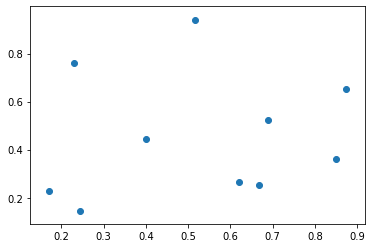

In [815]:
# import and format data
cwd = os.getcwd()
path_to_data = cwd +'\\cities.dat'
assert os.path.exists(path_to_data), "The path does not exist."
cities = np.genfromtxt(path_to_data,delimiter=[6,2,6],skip_header=3)
cities = cities[1:]
cities = np.delete(cities,1,axis=1)

x = cities.T[0]
y = cities.T[1]
plt.scatter(x,y)
print(x)
print(y)

In [800]:
np.random.RandomState(10)
N_neurons = 10

som = MiniSom(1, N_neurons, 2, sigma=2, learning_rate=.2,
              neighborhood_function='gaussian', random_seed=0)
points = np.array([x,y]).T
som.random_weights_init(points)


C:\Users\Boris\Anaconda3\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


C:\Users\Boris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


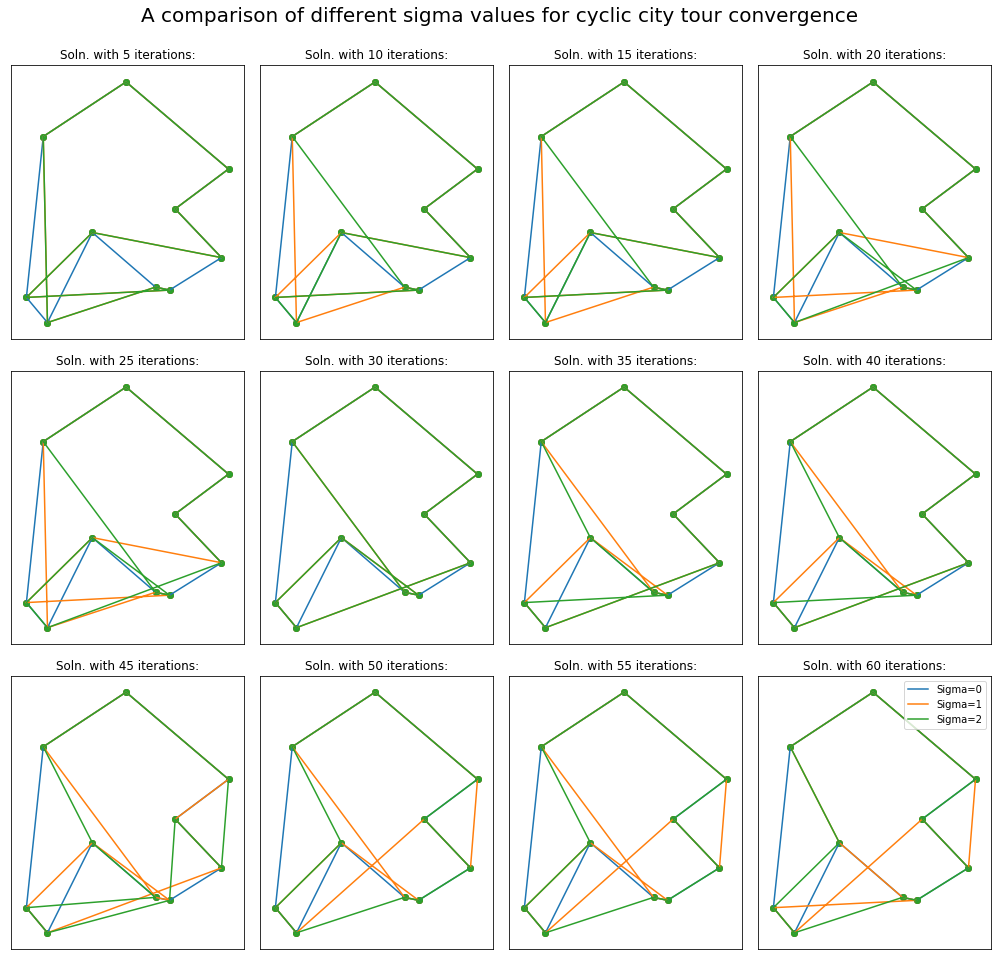

In [807]:
variances = [0,1,2]
plt.figure(figsize=(14, 14))
plt.suptitle('A comparison of different sigma values for cyclic city tour convergence', fontsize=20)
for v in variances:
    
    #plt.title('Convergence for cyclic tour with sigma ',v)
    for i, iterations in enumerate(range(5, 61, 5)):
        som = MiniSom(1, N_neurons, 2, sigma=v, learning_rate=.2, neighborhood_function='gaussian', random_seed=0)
        points = np.array([x,y]).T
        som.random_weights_init(points)
        som.train(points, iterations, verbose=False, random_order=False)
        plt.subplot(3, 4, i+1)
        plt.scatter(x,y)
        visit_order = np.argsort([som.winner(p)[1] for p in points])
        visit_order = np.concatenate((visit_order, [visit_order[0]]))
        plt.plot(points[visit_order][:,0], points[visit_order][:,1],label='Sigma={}'.format(v))
        plt.title("Soln. with {i} iterations:".format(i=iterations))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout(pad=1.2, rect=[0, 0.03, 1, 0.95])
plt.legend(loc='upper right')
plt.show()

In [548]:
np.random.RandomState(10)
N_points = 40
N_neurons = N_points*2
t = np.linspace(0, np.pi*2, N_points)
x = np.cos(t)+(np.random.rand(N_points)-.5)*.3
print(x.shape)
y = np.sin(t)+(np.random.rand(N_points)-.5)*.3

som = MiniSom(1, N_neurons, 2, sigma=8, learning_rate=.4,
              neighborhood_function='gaussian', random_seed=0)
points = np.array([x,y]).T
som.random_weights_init(points)

(40,)


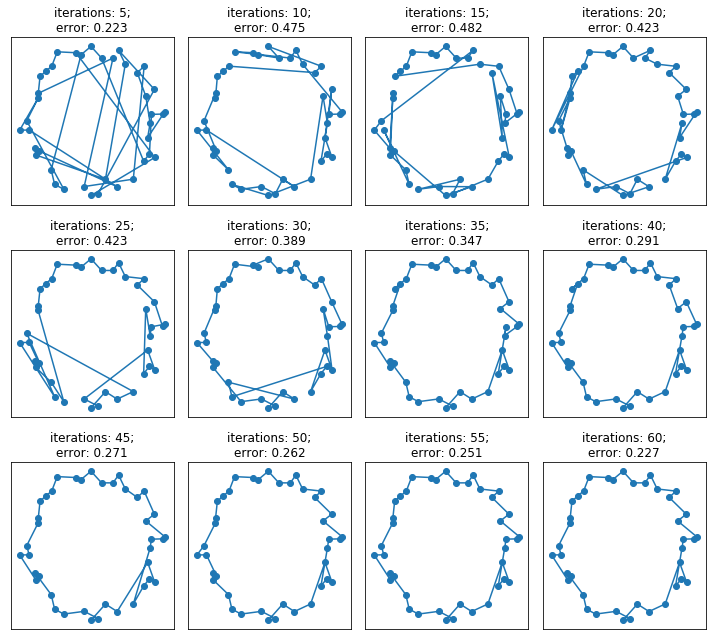

In [528]:
plt.figure(figsize=(10, 9))
for i, iterations in enumerate(range(5, 61, 5)):
    som.train(points, iterations, verbose=False, random_order=False)
    plt.subplot(3, 4, i+1)
    plt.scatter(x,y)
    visit_order = np.argsort([som.winner(p)[1] for p in points])
    visit_order = np.concatenate((visit_order, [visit_order[0]]))
    plt.plot(points[visit_order][:,0], points[visit_order][:,1])
    plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, 
                                                        e=som.quantization_error(points)))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [788]:
# TASK 4.3 - MP VOTING

 #look at data files
path_to_data_votes = cwd + '\\votes.dat'
print('Votes data\n')
f = open(path_to_data_votes, "r")
print(f.read())

path_to_data_district = cwd + '\\mpdistrict.dat'
print('District data\n')
f = open(path_to_data_district, "r")
print(f.read())

path_to_data_party = cwd + '\\mpparty.dat'
print('Party data\n')
f = open(path_to_data_party, "r")
print(f.read())

path_to_data_sex = cwd + '\\mpsex.dat'
print('Sex data\n')
f = open(path_to_data_sex, "r")
print(f.read())

path_to_data_names = cwd + '\\mpnames.txt'
print('Names data\n')
f = open(path_to_data_names, "r")
print(f.read())






Votes data

0,1,0,0.5,0,0,1,0.5,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,0.5,0.5,1,0,0.5,0,1,0,1,1,0.5,0,0,1,0.5,0,0,0.5,0,0.5,0,1,0,1,0,0,1,0,1,0,0,1,0.5,1,1,0,0.5,0,0,1,0,0.5,0,0,1,0.5,0,0,1,0,0,1,1,1,1,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,0,0.5,0,1,0,1,0,0.5,0,0,1,0.5,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,0.5,0.5,1,0,0.5,0,1,1,1,1,1,1,1,0.5,1,1,1,1,1,1,0.5,1,1,1,1,1,1,1,0.5,1,1,1,0.5,1,1,1,1,0.5,0,1,0,0.5,0,0,1,0.5,0,0,1,0,0,1,1,1,1,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0,0.5,0,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0.5,1,1,0,1,0.5,0,0.5,0,1,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,1,1,1,1,0.5,1,1,1,1,1,1,0.5,1,1,1,1,1,1,1,0.5,1,1,1,0.5,1,1,1,1,0.5,1,1,1,1,1,1,0.5,1,1,1,1,1,1,0.5,1,1,0,1,1,1,0.5,0.5,1,1,1,1,1,1,1,1,0.5,0,1,1,0.5,0,0,1,0.5,0,0,0.5,0,0.5,0,1,0,1,0,0,1,0,1,0,0,1,0.5,1,1,0,0.5,0,0,0,0,1,0,0,1,0.5,0,0,1,0,1,0.5,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0.5,0.5,0.5,1,1,1,1,1,1,0.5,1,1,1,1,1,1,0.5,1,1,1,1,1,1,1,0.5,1,1,1,0.5,1,1,1,1,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1,0.5,1,1,1,1,1,1,1,0.5,1,1,1,0.5,1,1,1,1,0.5,0,1,0,0.5,0,

In [789]:
# save data

votes = np.genfromtxt(path_to_data_votes, delimiter=',')
votes = votes.reshape(349,31)
district = np.genfromtxt(path_to_data_district,dtype='int')
party = np.genfromtxt(path_to_data_party, skip_header=3,dtype='int')
sex = np.genfromtxt(path_to_data_sex, skip_header=2,dtype='int')
names = np.genfromtxt(path_to_data_names,dtype='U25',delimiter='%%!')
print(cities.shape)
print(district.shape)
print(party.shape)
print(sex.shape)
print(names.shape)

(349, 31)
(349,)
(349,)
(349,)
(349,)


In [790]:
print(sex)

[0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1
 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1
 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1]


In [791]:
import pandas as pd

data = pd.DataFrame(votes,columns=(np.arange(np.shape(votes)[1])+1))
data['district']=district
data['party']=party
data['sex']=sex
data['names']=names

In [792]:
data # numbers in columns are the different votes that were held

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,district,party,sex,names
0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.5,1.0,0.0,0.5,0.0,1.0,1,1,0,Skårman Carl-Erik
1,0.0,1.0,1.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.5,1.0,1.0,0.0,0.5,0.0,1,2,0,Romanus Gabriel
2,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.5,1.0,0.0,0.5,0.0,1.0,1,1,0,Odenberg Mikael
3,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.5,1.0,0.0,0.5,0.0,1.0,1,1,0,Järrel Henrik S
4,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,1.0,0.5,1,3,1,Lindgren Sylvia
5,0.0,1.0,0.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.5,0.5,0.0,0.5,0.0,1.0,1,1,1,Ask Beatrice
6,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.5,0.5,0.5,0.5,0.5,0.5,1,4,1,Hoffmann Ulla
7,0.5,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,1.0,0.5,1,3,1,Nordlander Inger
8,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.5,1,5,1,Ruwaida Yvonne
9,0.0,1.0,1.0,0.5,0.0,0.0,1.0,0.5,0.0,0.0,...,0.5,1.0,1.0,0.0,0.5,0.0,1,2,0,Könberg Bo


In [793]:
# create and train a self organising map

np.random.RandomState(10)
N_neurons = 10

som = MiniSom(N_neurons, N_neurons, 31, sigma=3, learning_rate=.2,
              neighborhood_function='gaussian', random_seed=2)
som.random_weights_init(votes) # initialise as random votes






In [794]:
som.train(votes+np.random.normal(0,0.3,size=(349,31)), num_iteration=20, verbose=False, random_order=False)

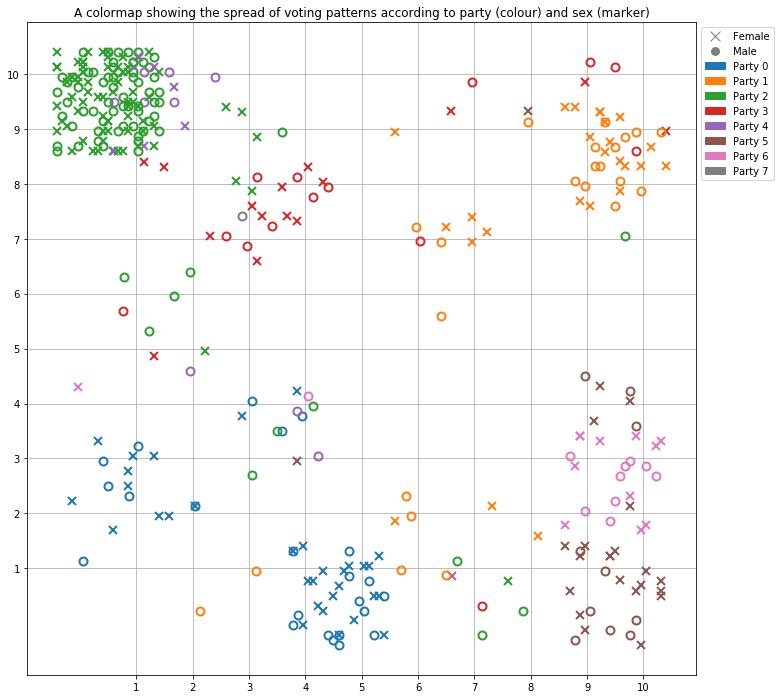

In [795]:
plt.figure(figsize=(12, 12))

#plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 'x']
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7']
parties = ['0','1','2','3','4','5','6','7']
for cnt, xx in enumerate(votes):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5++(np.random.randint(-10,11)*.09), w[1]+.5+(np.random.randint(-10,11)*.09), markers[sex[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[party[cnt]-1], markersize=8, markeredgewidth=2)
plt.title('A colormap showing the spread of voting patterns according to party (colour) and sex (marker)')

plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10])
plt.yticks(ticks=[1,2,3,4,5,6,7,8,9,10])


legend_elements = [Line2D([0], [0], marker='x', color='w', label='Female', markeredgecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='tab:grey', markersize=10),
                   Patch(facecolor='C0', edgecolor='C0',
                         label='Party 0'),
                  Patch(facecolor='C1', edgecolor='C1',
                         label='Party 1'),
                  Patch(facecolor='C2', edgecolor='C2',
                         label='Party 2'),
                  Patch(facecolor='C3', edgecolor='C3',
                         label='Party 3'),
                  Patch(facecolor='C4', edgecolor='C4',
                         label='Party 4'),
                  Patch(facecolor='C5', edgecolor='C5',
                         label='Party 5'),
                  Patch(facecolor='C6', edgecolor='C6',
                         label='Party 6'),
                  Patch(facecolor='C7', edgecolor='C7',
                         label='Party 7')]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.grid()

# Adjust layout to make room for the table:
#plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()


In [796]:
print((votes+np.random.normal(0,0.2,size=(349,31))).shape)

(349, 31)


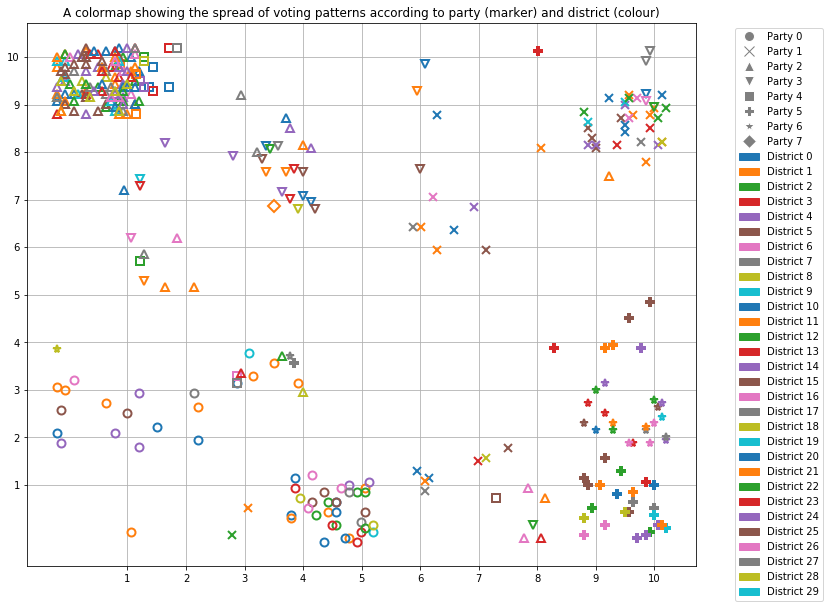

In [797]:
plt.figure(figsize=(12, 10))

#plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar(label='Magnitude/Distance relative to other nodes')


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 'x','^','v','s','P','*','D']
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C21', 'C22','C23','C24','C25','C26','C27','C28','C29']
#parties = ['0','1','2','3','4','5','6','7']
#district = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29']
for cnt, xx in enumerate(votes):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5++(np.random.randint(-10,11)*.07), w[1]+.5+(np.random.randint(-10,11)*.07), markers[party[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[district[cnt]-1], markersize=8, markeredgewidth=2)
plt.title('A colormap showing the spread of voting patterns according to party (marker) and district (colour)')
#plt.set_xticks([1,2,3,4,5,6,7,8,9,10])
#plt.set_yticks([1,2,3,4,5,6,7,8,9,10])
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10])
plt.yticks(ticks=[1,2,3,4,5,6,7,8,9,10])


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Party 0', markerfacecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='x', color='w', label='Party 1', markeredgecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='Party 2', markerfacecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='v', color='w', label='Party 3', markerfacecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Party 4', markerfacecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='P', color='w', label='Party 5', markerfacecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='*', color='w', label='Party 6', markerfacecolor='tab:grey', markersize=10),
                   Line2D([0], [0], marker='D', color='w', label='Party 7', markerfacecolor='tab:grey', markersize=10),
                   Patch(facecolor='C0', edgecolor='C0',
                         label='District 0'),
                  Patch(facecolor='C1', edgecolor='C1',
                         label='District 1'),
                  Patch(facecolor='C2', edgecolor='C2',
                         label='District 2'),
                  Patch(facecolor='C3', edgecolor='C3',
                         label='District 3'),
                  Patch(facecolor='C4', edgecolor='C4',
                         label='District 4'),
                  Patch(facecolor='C5', edgecolor='C5',
                         label='District 5'),
                  Patch(facecolor='C6', edgecolor='C6',
                         label='District 6'),
                  Patch(facecolor='C7', edgecolor='C7',
                         label='District 7'),
                Patch(facecolor='C8', edgecolor='C8',
                         label='District 8'),
                  Patch(facecolor='C9', edgecolor='C9',
                         label='District 9'),
                                     Patch(facecolor='C10', edgecolor='C10',
                         label='District 10'),
                  Patch(facecolor='C11', edgecolor='C11',
                         label='District 11'),
                  Patch(facecolor='C12', edgecolor='C12',
                         label='District 12'),
                  Patch(facecolor='C13', edgecolor='C13',
                         label='District 13'),
                  Patch(facecolor='C14', edgecolor='C14',
                         label='District 14'),
                  Patch(facecolor='C15', edgecolor='C15',
                         label='District 15'),
                  Patch(facecolor='C16', edgecolor='C16',
                         label='District 16'),
                  Patch(facecolor='C17', edgecolor='C17',
                         label='District 17'),
                Patch(facecolor='C18', edgecolor='C18',
                         label='District 18'),
                  Patch(facecolor='C19', edgecolor='C19',
                         label='District 19'),
                                     Patch(facecolor='C20', edgecolor='C20',
                         label='District 20'),
                  Patch(facecolor='C21', edgecolor='C21',
                         label='District 21'),
                  Patch(facecolor='C22', edgecolor='C22',
                         label='District 22'),
                  Patch(facecolor='C23', edgecolor='C23',
                         label='District 23'),
                  Patch(facecolor='C24', edgecolor='C24',
                         label='District 24'),
                  Patch(facecolor='C25', edgecolor='C25',
                         label='District 25'),
                  Patch(facecolor='C26', edgecolor='C26',
                         label='District 26'),
                  Patch(facecolor='C27', edgecolor='C27',
                         label='District 27'),
                Patch(facecolor='C28', edgecolor='C28',
                         label='District 28'),
                  Patch(facecolor='C29', edgecolor='C29',
                         label='District 29'),]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()

# Adjust layout to make room for the table:
#plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()
